In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
file_path ="M:/SEM 4/Advanced python/Python Dataset2.csv"  # Update the path if needed
#Reading csv file
df = pd.read_csv(file_path)

# Explore the dataset
print("Dataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nData types:")
print(df.dtypes)

print("\nDataset Shape:")
print(df.shape)


# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Drop columns with all null values
df.dropna(axis=1, how='all', inplace=True)

# Fill missing values in numeric columns with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Final missing value check
print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())

# Handle duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
df.drop_duplicates(inplace=True)

# Final dataset shape
print("\nFinal Dataset Shape:", df.shape)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61725 entries, 0 to 61724
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   State/Ut Name               61725 non-null  object
 1   Pc No                       61725 non-null  int64 
 2   PC Name                     61725 non-null  object
 3   Total Electors In PC        61725 non-null  int64 
 4   AC No                       61725 non-null  int64 
 5   AC Name                     61725 non-null  object
 6   Total Electors In AC        61725 non-null  int64 
 7   Total Valid Votes In State  61725 non-null  int64 
 8   Nota Votes Evm In AC        61725 non-null  int64 
 9   Candidate Name              61725 non-null  object
 10  Party                       61725 non-null  object
 11  Votes Secured Evm           61725 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 5.7+ MB
None

First 5 rows:
    State/Ut Name  Pc N

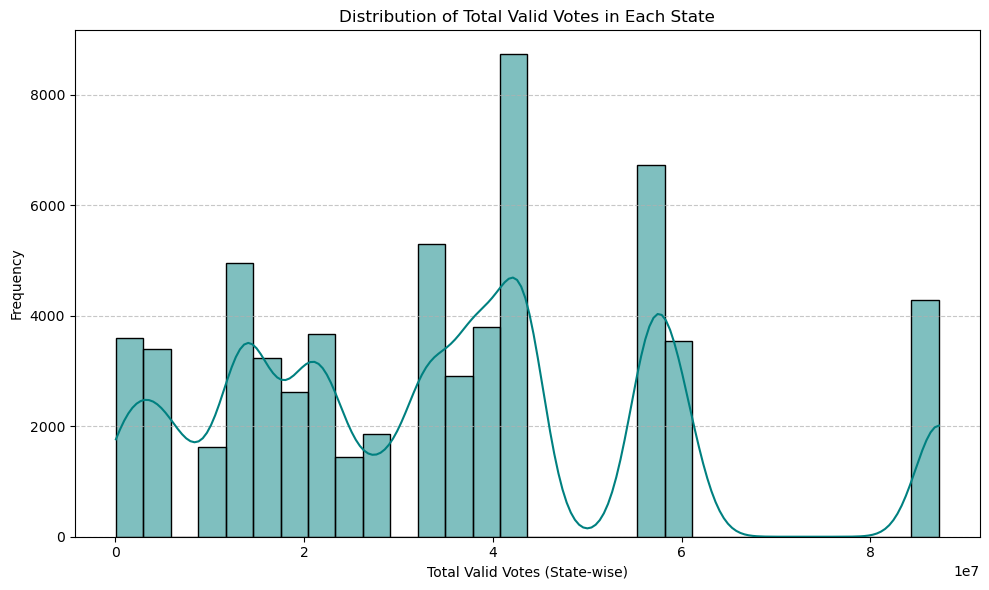

In [2]:
#Distribution of Total Valid Votes in Each State
plt.figure(figsize=(10, 6))
sns.histplot(
    df['Total Valid Votes In State'],  
    bins=30, 
    kde=True, 
    color='teal'
)

plt.xlabel("Total Valid Votes (State-wise)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Valid Votes in Each State")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()





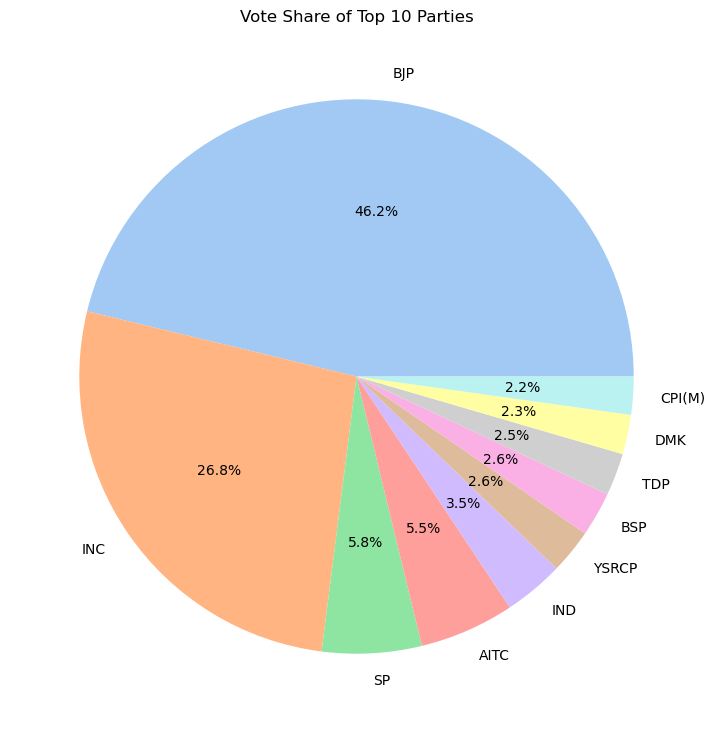

In [3]:
#Vote Share of Top 10 Parties


total_votes_by_party = df.groupby('Party')['Votes Secured Evm'].sum().sort_values(ascending=False)
top_10 = total_votes_by_party.head(10)

plt.figure(figsize=(9, 9))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Vote Share of Top 10 Parties")
plt.show()







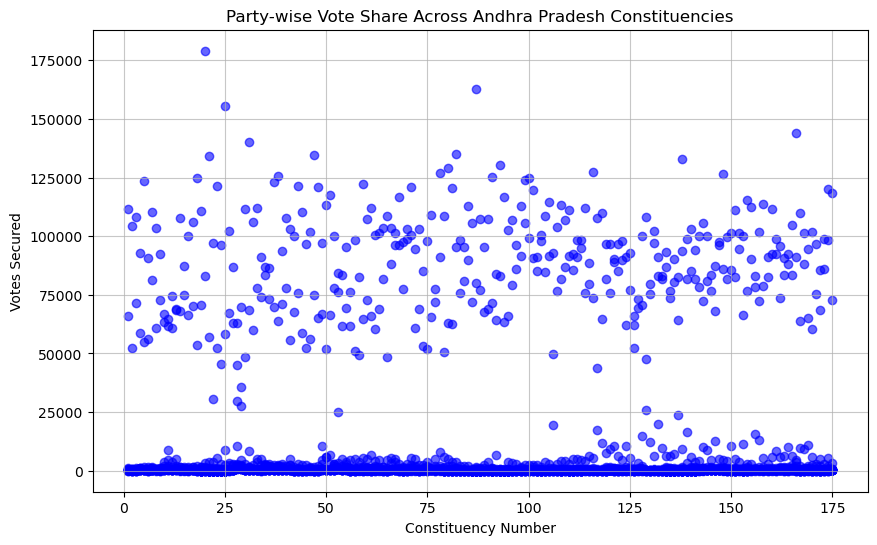

In [4]:
#Party-wise Vote Share Across Andhra Pradesh Constituencies
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True)

ap_data = df[df['State/Ut_Name'] == 'Andhra Pradesh']
top_parties = ap_data.groupby('Party')['Votes_Secured_Evm'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.scatter(ap_data['AC_No'], ap_data['Votes_Secured_Evm'], c='blue', alpha=0.6)
plt.xlabel("Constituency Number")
plt.ylabel("Votes Secured")
plt.title("Party-wise Vote Share Across Andhra Pradesh Constituencies")
plt.grid(alpha=0.7)
plt.show()

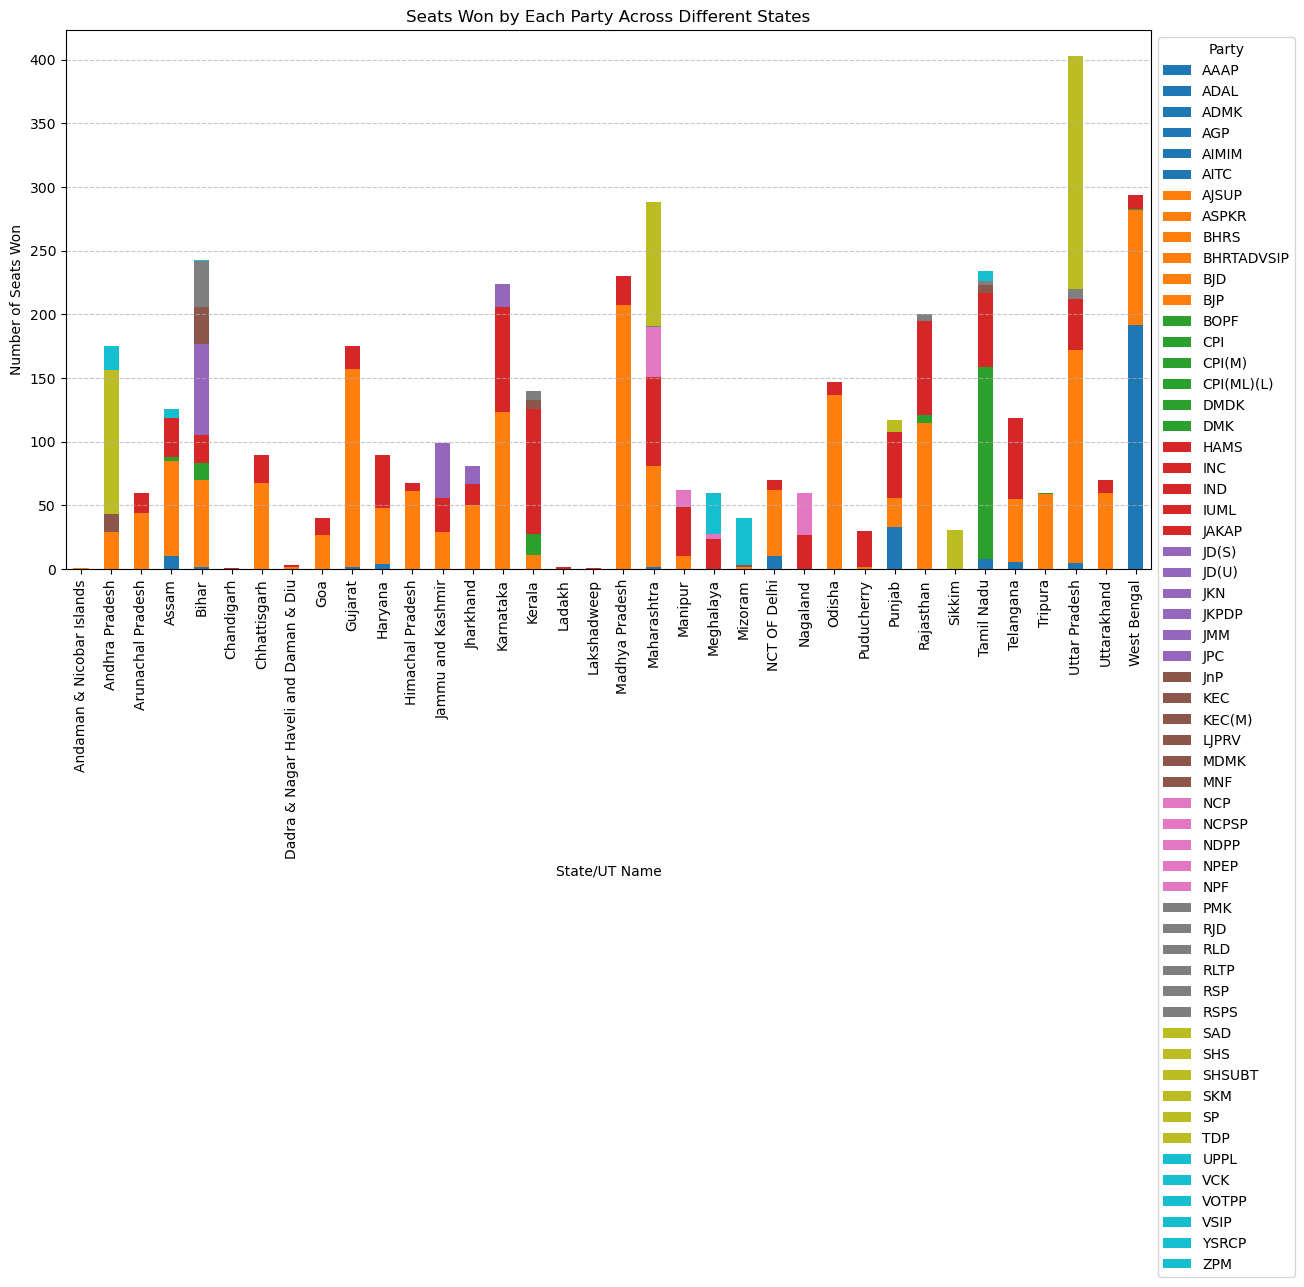

In [5]:
#Seats Won by Each Party Across Different States

df = pd.read_csv(file_path)

df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True)

winning_candidates = df.loc[df.groupby(['State/Ut_Name', 'AC_No'])['Votes_Secured_Evm'].idxmax()]
seats_won = winning_candidates.groupby(['State/Ut_Name', 'Party']).size().unstack().fillna(0)

seats_won.plot(kind='bar', stacked=True, figsize=(14, 7), colormap="tab10")
plt.xlabel("State/UT Name")
plt.ylabel("Number of Seats Won")
plt.title("Seats Won by Each Party Across Different States")
plt.xticks(rotation=90)
plt.legend(title="Party", bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Distribution of Votes Secured by YSRCP & TDP  
df_filtered = df[df['Party'].isin(['YSRCP', 'TDP'])]
pc_wise_votes = df_filtered.groupby(['State/Ut Name', 'PC Name', 'Party'])['Votes Secured Evm'].sum().unstack().fillna(0)
colors = {'YSRCP': 'blue', 'TDP': 'yellow'}




plt.figure(figsize=(10, 6))
sns.histplot(df_filtered[df_filtered['Party'] == 'YSRCP']['Votes Secured Evm'], bins=20, color='blue', label='YSRCP', kde=True, alpha=0.6)
sns.histplot(df_filtered[df_filtered['Party'] == 'TDP']['Votes Secured Evm'], bins=20, color='yellow', label='TDP', kde=True, alpha=0.6)

plt.xlabel("Votes Secured")
plt.ylabel("Frequency")
plt.title("Distribution of Votes Secured by YSRCP & TDP")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



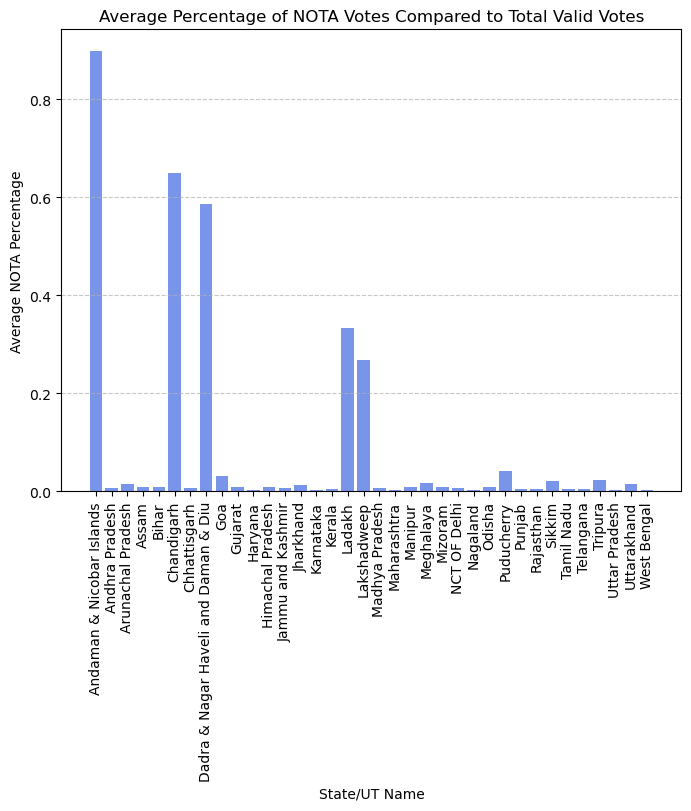

In [6]:
#Average Percentage of NOTA Votes Compared to Total Valid Votes in Each State

df['NOTA_Percentage'] = df['Nota_Votes_Evm_In_AC'] / df['Total_Valid_Votes_In_State'] * 100
nota_by_state = df.groupby('State/Ut_Name')['NOTA_Percentage'].mean()

plt.figure(figsize=(8, 6))
plt.bar(nota_by_state.index, nota_by_state.values, color='royalblue', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("State/UT Name")
plt.ylabel("Average NOTA Percentage")
plt.title("Average Percentage of NOTA Votes Compared to Total Valid Votes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

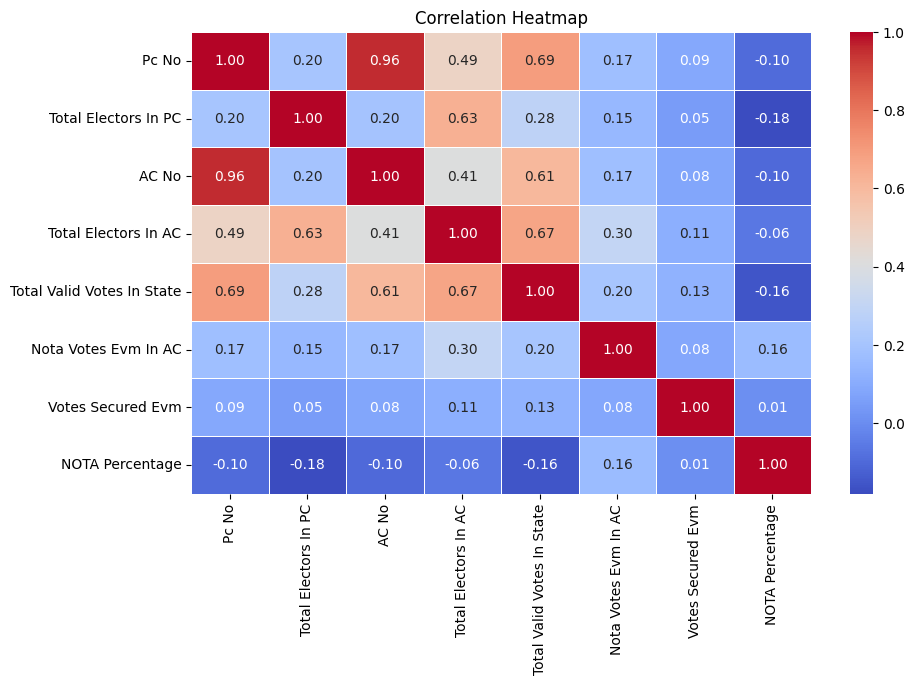

In [22]:
#Correlation Heatmap
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

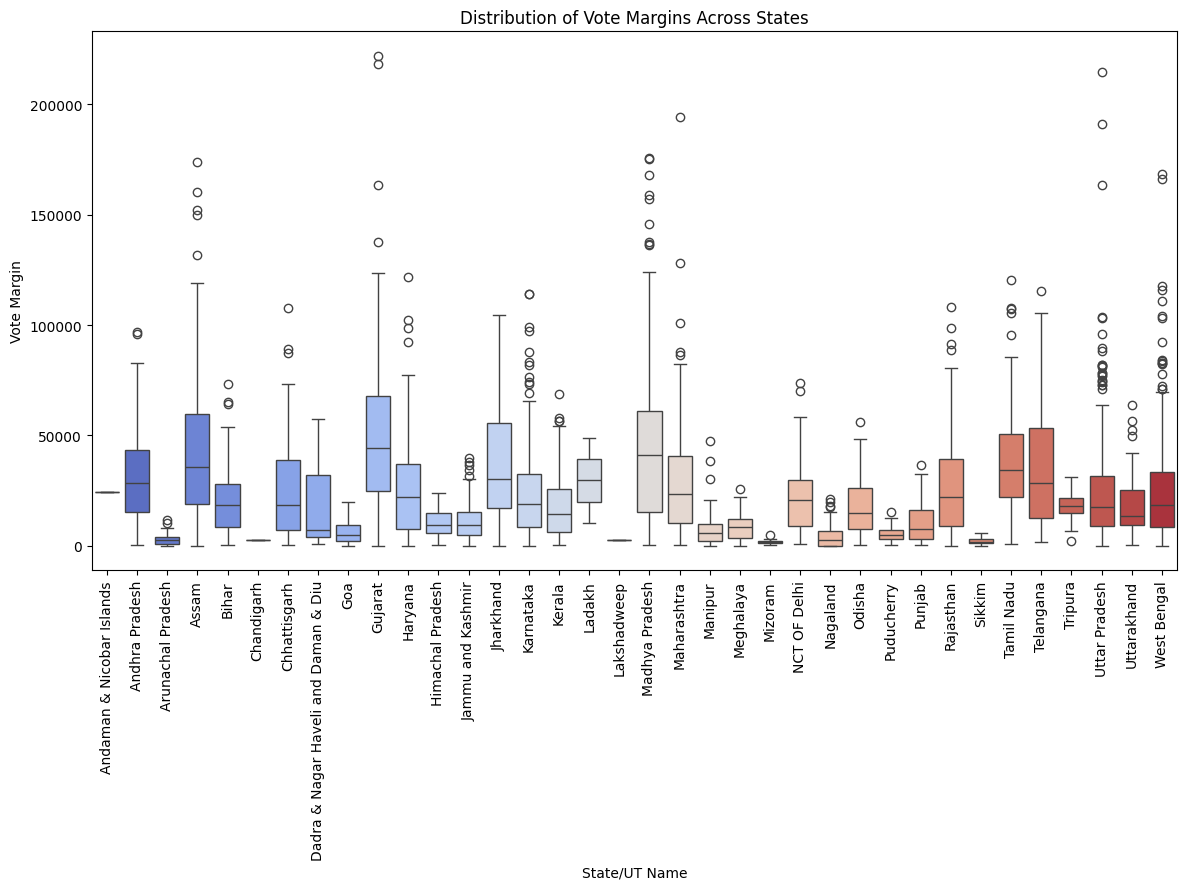

In [48]:
#Distribution of Vote Margins Across States

df_sorted = df.sort_values(by=['State/Ut_Name', 'AC_No', 'Votes_Secured_Evm'], ascending=[True, True, False])
top_two = df_sorted.groupby(['State/Ut_Name', 'AC_No']).head(2).copy()
top_two['Vote_Margin'] = top_two.groupby(['State/Ut_Name', 'AC_No'])['Votes_Secured_Evm'].diff().abs()

plt.figure(figsize=(14, 7))
sns.boxplot(x="State/Ut_Name", y="Vote_Margin", hue="State/Ut_Name", data=top_two, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.xlabel("State/UT Name")
plt.ylabel("Vote Margin")
plt.title("Distribution of Vote Margins Across States")
plt.show()

The state with the most candidates is Maharashtra with 1113 candidates.


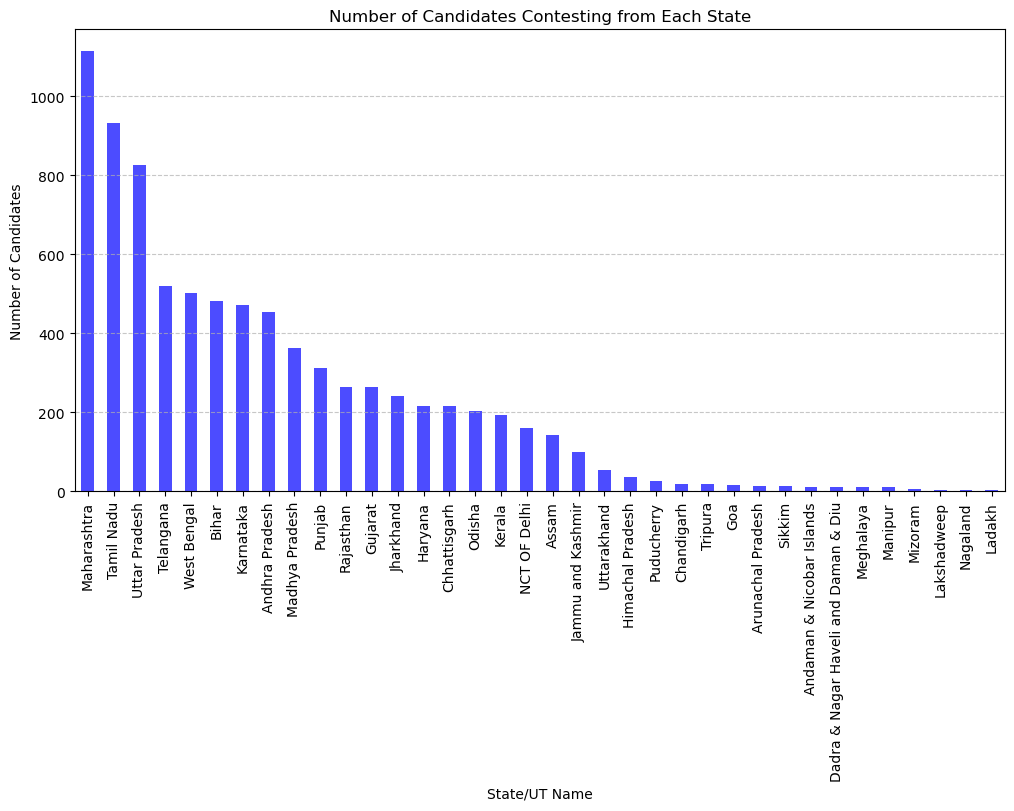

In [5]:
#Number of Candidates Contesting from Each State
candidates_per_state = df.groupby('State/Ut Name')['Candidate Name'].nunique().sort_values(ascending=False)


most_candidates_state = candidates_per_state.idxmax()
most_candidates_count = candidates_per_state.max()

print(f"The state with the most candidates is {most_candidates_state} with {most_candidates_count} candidates.")

plt.figure(figsize=(12, 6))
candidates_per_state.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("State/UT Name")
plt.ylabel("Number of Candidates")
plt.title("Number of Candidates Contesting from Each State")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()